# Resistivity for BO-1X

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec
import lasio as la
import scipy as sc
import bruges as br
#import mlo_module as mlo
#from my_plot import set_size
width = 433.62
import segyio
from shutil import copyfile
from scipy import interpolate
from scipy.interpolate import make_interp_spline
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose
import welly as wl
import urllib
import seaborn as sns

from welly import Project 
from welly import Well

%matplotlib inline

path_data ='//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/'
path_las = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/'
path_wvlt = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/wavelets/'
fig_path = 'M:/LOCRETA_WORKPACKAGE_D/Valdemar_sprint_well_data_Mads_L/MLO documents/Figures/'
path_hrs = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/HRS project/Locreta_proj_Mads_localtest.prj/seismic.dir/'
path_wells =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/'
path_project = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/'

In [2]:
path_bo1x = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/wells_res_invest/'

In [3]:
zones = pd.read_excel(path_project+'Zones-wells-LOCRETA.xlsx')
zones = zones.drop(index=0)
zones['MD'] = zones['MD']*0.3048 #ft to m

In [4]:
#bo1x = la.read(path_bo1x + 'BO1X_ILD.las')

In [5]:
#bo1x.to_csv(path_bo1x + 'BO1X_ILD.csv')

In [6]:
test = pd.read_csv(path_bo1x + 'BO1X_ILD.csv')
test = test[1:].astype(float)
test['Depth'] = test['MD']*0.3048
test['UWI'] = 'BO-1X'
well_list = ['BO-1X']

In [7]:
df = pd.DataFrame(columns=test.columns.to_list())

In [8]:
for i in range(len(well_list)):
    print(well_list[i])
    df = df.append(test.loc[(test['UWI'] == well_list[i]) &  (test['Depth'] > zones['MD'][zones.loc[(zones['WellName'] == well_list[i])].index[0]]) & (test['Depth'] < zones['MD'][zones.loc[(zones['WellName'] == well_list[i])].index[-1]])])
    #df = df.append(test.loc[(test['UWI'] == well_list[i]) &  (test['Depth'] > zones['MD'][zones.loc[(zones['WellName'] == well_list[i])].index[0]]) & (test['Depth'] < zones.loc[(zones['WellName'] == well_list[i]) & (zones['ZONE_NAME']=='Valhall')]['MD'].values[0])])
    
    #df = df.append(test.loc[(test['UWI'] == well_list[i]) & (test['Depth'] < zones.loc[(zones['wellName'] == well_list[i]) & (zones['ZONE_NAME']=='Valhall')]['MD'].values[0])])
    #print(zones['MD'][zones.loc[(zones['wellName'] == well_list[i])].index[0]])

df = df.drop_duplicates()   
df = df.replace([np.inf,-999.2500, -9999.00000], np.nan)
df.reset_index(drop=True,inplace=True)

BO-1X


In [9]:
df

,DEPT,MD,CALI,GR,ILD,LLD,LLS,MSFL,NPHI,RHOB,SN,DT,SONIC,RHO_TEST,RESISTIVITY_DESP,RESISTIVITY_C,Depth,UWI
0,7459.0,7459.0,12.6937,19.1890,NaN,2.0660,2.0388,2.5773,29.0598,2.3961,NaN,79.8433,83.7323,2.39612,NaN,NaN,2273.5032,BO-1X
1,7459.5,7459.5,12.6789,20.5186,NaN,2.0005,1.9933,2.7691,29.1968,2.4214,NaN,84.6889,88.9532,2.42138,NaN,NaN,2273.6556,BO-1X
2,7460.0,7460.0,12.6629,20.8992,NaN,2.1573,2.2003,3.3817,29.0745,2.4143,NaN,89.5344,94.3528,2.41430,NaN,NaN,2273.8080,BO-1X
3,7460.5,7460.5,12.6683,21.6248,NaN,2.3401,2.3478,4.2120,28.7502,2.3992,NaN,90.6133,92.8443,2.39920,NaN,NaN,2273.9604,BO-1X
4,7461.0,7461.0,12.6760,22.8467,NaN,2.2834,2.2879,3.8345,28.6609,2.4065,NaN,91.6921,93.6822,2.40650,NaN,NaN,2274.1128,BO-1X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,7905.0,7905.0,11.4371,36.7065,1.0424,NaN,NaN,NaN,30.9380,2.3212,1.3574,NaN,114.5316,2.32120,1.0424,1.02817,2409.4440,BO-1X
893,7905.5,7905.5,11.4719,40.4675,1.0289,NaN,NaN,NaN,32.2646,2.3103,1.3541,NaN,114.2118,2.31030,1.0289,1.03108,2409.5964,BO-1X
894,7906.0,7906.0,11.4770,44.0808,1.0285,NaN,NaN,NaN,33.2097,2.3176,1.3332,NaN,116.0842,2.31759,1.0285,1.02793,2409.7488,BO-1X
895,7906.5,7906.5,11.5031,49.1252,1.0249,NaN,NaN,NaN,32.5669,2.3038,1.2946,NaN,120.0769,2.30381,1.0249,1.02389,2409.9012,BO-1X


In [10]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

In [11]:
df['Zone'] = np.nan

In [12]:
test.loc[test['UWI']=='BO-1X']

,DEPT,MD,CALI,GR,ILD,LLD,LLS,MSFL,NPHI,RHOB,SN,DT,SONIC,RHO_TEST,RESISTIVITY_DESP,RESISTIVITY_C,Depth,UWI
1,230.0,230.0,NaN,18.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1040,BO-1X
2,230.5,230.5,NaN,18.4993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.2564,BO-1X
3,231.0,231.0,NaN,19.1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4088,BO-1X
4,231.5,231.5,NaN,19.7087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.5612,BO-1X
5,232.0,232.0,NaN,17.7385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.7136,BO-1X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,9008.0,9008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.6384,BO-1X
17558,9008.5,9008.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.7908,BO-1X
17559,9009.0,9009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.9432,BO-1X
17560,9009.5,9009.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2746.0956,BO-1X


In [13]:
for i in range(len(well_list)):
    print(well_list[i])
    for k in range(len(zones.loc[zones['WellName']==well_list[i]])):
        dummy = zones.loc[zones['WellName']==well_list[i]].copy()
        dummy = dummy.reset_index(drop=True)
        df['Zone'][find_nearest(df.loc[df['UWI'] == well_list[i]]['Depth'],dummy['MD'][k]) + df.loc[df['UWI'] == well_list[i]]['Depth'].index[0]] = dummy['ZONE_NAME'][k]

BO-1X


In [14]:
df['Zone'] = df['Zone'].fillna(method='ffill')

In [15]:
df['Zone'].unique()

array(['Rødby', 'Albian_Shale', 'L.Sola-1', 'U.Tuxen-1', 'M.Tuxen-2',
       'M.Tuxen-1', 'Munk_Marl', 'L.Tuxen-3', 'L.Tuxen-2', 'L.Tuxen-1',
       'Valhall'], dtype=object)

<AxesSubplot:xlabel='Depth', ylabel='RESISTIVITY_C'>

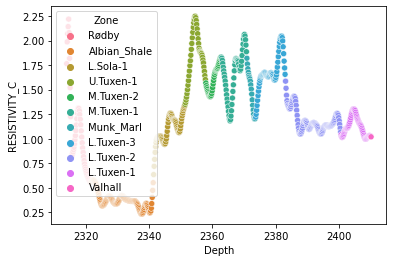

In [17]:
sns.scatterplot(data=df, x= 'Depth',y='RESISTIVITY_C', hue='Zone')

In [24]:
df['ILD_log10'] = np.log1p(df['RESISTIVITY_C'])
df['DEPTH'] = df['Depth']
df = df.drop(index = df.loc[df['Zone']=='Valhall'].index.values)

In [25]:
df.to_csv(path_project+'BO-1X_ILD.csv',index=False)